# ZA DRUGI KOLOKVIJ

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture

import scipy.stats as stats

## NEURONSKA MREŽA

Neuronska mreža se sastoji od slojeva, a  svaki sloj sadrži aktivacijske jedinice. **Prvi** i **zadnji** sloj su **ulazni** podaci odnosno, **izlazne** vrijednosti. <br>
Svi slojevi između se nazivaju **skrivenim** slojevima. <br> 
Svaka jedinica u skrivenim slojevima je linearna kombinacija jedinica iz prethodnih slojeva, tako se dobiju potpuno povezani slojevi. Svaka aktivacijska jedinica ima pridruženu aktivacijsku funkciju.<br>

Promotrimo malo oznake ulazne jedinice su označene s $x_i$. Zatim težine $\theta$ između prvog i drugog sloja imaju u ekspontnu $(1)$ što označava između kojih slojeva se nalaze. U indeksu imaju dva broja, npr. $\theta^{(1)}_{12}$ što označava da je to težina koja ide u **prvu** aktivacijsku jedinicu sljedećeg sloja, a dolazi iz **druge aktivacijske jedinice.** <br>


Nadalje, pokazano vam je kako izgleda računanje u neuronskoj mreži. <br>

Prateći gornju sliku, uvedemo sljedeće oznake i imamo<br>

$z_1^{(2)} = \theta_{10}^{(1)}x_0 + \theta_{11}^{(1)}x_1 + \theta_{12}^{(1)}x_2 + ... + \theta_{1n}^{(1)}x_n$ <br>
$z_2^{(2)} =\theta_{20}^{(1)}x_0 + \theta_{21}^{(1)}x_1 + \theta_{22}^{(1)}x_2 + ... + \theta_{2n}^{(1)}x_n$<br>

$a_1^{(2)} = g(z_1^{(2)})$<br>
$a_2^{(2)} = g(z_2^{(2)})$<br>

$z_1^{(3)} = \theta_{10}^{(2)}z_0^{(2)} + \theta_{11}^{(2)}z_1^{(2)} + \theta_{12}^{(2)}z_2^{(2)} + ... + \theta_{1n}^{(2)}z_n^{(2)}$
<br>

$a_1^{(3)} = g(z_1^{(3)})$
<br>

itd.



Najčešći izbor za aktivacijsku funkciju su 

- Sigmoid
- Tanh
- ReLU
- identiteta


Funkciju sigmoid ste već upoznali. Definirana je sa $$ \sigma:\mathbb{R}\rightarrow[0,1], \quad \sigma(x) = \frac{1}{1+e^{-x}}. $$ 

Tangens hiperbolni odnosno tanh funkcija je definirana s 
$$ tanh(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$
Rectified Linear Unit, odnosno ReLU je  na sljedeći način 
$$ ReLU: \mathbb{R} \rightarrow [0,\infty], \; ReLU(x) =  max \{0,x\} .$$


<br>

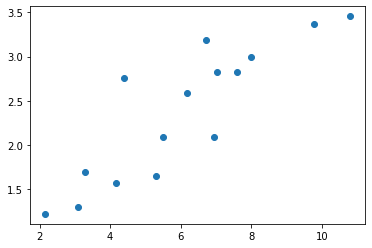

In [3]:
#Napravit ćemo primjer NM ručno zapisan
#podaci
x = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59], [2.167], [7.042], [10.791], [5.313], [7.998], [3.1]], dtype=np.float32)
y = np.array([[1.7], [2.76], [2.09], [3.19], [2.094], [1.57], [3.366], [2.59], [2.82], [1.221], [2.821], [3.456], [1.65], [2.99], [1.3]], dtype=np.float32)
plt.scatter(x,y)

Ulazni podaci (15, 1)
Težine w1 (1, 100)
Težine w2 (100, 1)
Pogreska u iteraciji 0 iznosi 1518.9520052263708
Pogreska u iteraciji 100 iznosi 1.23134232010841
Pogreska u iteraciji 200 iznosi 1.1074053692197972
Pogreska u iteraciji 300 iznosi 1.038890924337598
Pogreska u iteraciji 400 iznosi 1.0012288739606174
Pogreska u iteraciji 500 iznosi 0.9805628048594135
Pogreska u iteraciji 600 iznosi 0.9692121122818841
Pogreska u iteraciji 700 iznosi 0.9629591286796977
Pogreska u iteraciji 800 iznosi 0.9594966943299971
Pogreska u iteraciji 900 iznosi 0.9575636642563576


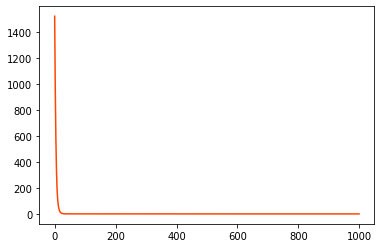

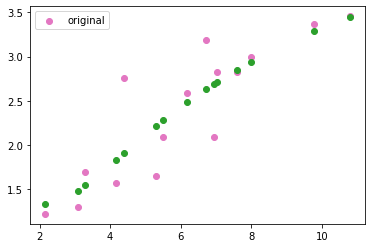

Podatak =  [3.3]
Mnozimo podatak [3.3] sa svim težinama
[ 2.20474906 -0.44488176 -4.92223889 -2.57548477 -0.7575563 ] ...
Sve dobivene aktivacijske jedinice napadnemo sa sigmoidom
[0.90067517 0.39057836 0.00723015 0.07073294 0.31917705] ...
Napravimo linearnu kombinaciju dobivenih aktivacijski jedinica sa težinama w2
[1.54341788]


In [4]:
#dimenzije slojeva
inputSize = 1
hiddenSize = 100
outputSize = 1
# Inicijalizirat ćemo neke početne težine
# Težine ćemo označavati nadalje s w umjesto theta (zbog jednostavnosti i w-weights je uobičajeno :-) )
w1 = np.random.randn(inputSize, hiddenSize)
w2 = np.random.randn(hiddenSize, outputSize)
# Za aktivacijsku funkciju koristit ćemo sigmoid 
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
# Provjerimo dimenzije podataka

print("Ulazni podaci",x.shape)
print("Težine w1", w1.shape)
print("Težine w2", w2.shape)
# ALGORITAM:
learningRate = 1e-4 # npr. 1e-6 premalo

# Za crtanje funkcije pogreške
loss_values = []

for i in range(1000):
    
    # Prolazak unaprijed (forward pass): izračunaj predikciju
    # pomnozimo x sa w1 (napravimo linearnu kombinaciju)
    # djelujemo sa aktivacijskom funkcijom
    # pomnozimo sa w2 
    a2 = x @ w1 # Pomnozimo x sa svakom težinom
    z2 = sigmoid(a2) # Djelujemo sa aktivacijskom funkcijom - ove vrijednosti tu su sada neuroni u skvirenom sloju
    y_pred = z2 @ w2 # Pomnozimo sa drugim parom tezina - sada se nalazimo u zadnjem sloju
    
    # Nakon sto smo napravili jedan prolazak unaprijed idemo izracunati pogresku
    loss = (1/2)*np.sum((y_pred - y)**2) # suma kvadratnih odstupanja
    loss_values.append(loss)
    if i%100==0:
        print ('Pogreska u iteraciji {} iznosi {}'.format(i, loss))
    
    # Na kraju trebamo napraviti backpropagaciju kako bismo izračunali gradijente
    # i ažurirati težine (parametre)
    
    
    # ---- pocetak backprop ------------
    grad_w2 = (z2.T) @ (y_pred - y)
    
    grad_w1_ = (y_pred-y) @ (w2.T)
    grad_w1 = (x.T) @ ((sigmoid(a2)*(1-sigmoid(a2)))*grad_w1_)
    # ---- kraj backprop ------------
    #print(grad_w1)
    #print(grad_w2)
    
    # Ažuriramo težine
    w1 = w1 - learningRate * grad_w1
    w2 = w2 - learningRate * grad_w2

plt.plot(np.arange(0,1000,1), loss_values, color='orangered')
plt.show()
# Na kraju, kako bismo vidjeli što smo dobili prebacit ćemo predikcije u numpy array
# i nacrati ih

predicted = y_pred
plt.scatter(x,y,color='tab:pink', label = "original")
plt.scatter(x,predicted, color = 'tab:green')

plt.legend()
plt.show()
# Analiza mreže
print('Podatak = ',x[0])
print('Mnozimo podatak', x[0], 'sa svim težinama')
print(x[0].dot(w1)[:5], '...')
print('Sve dobivene aktivacijske jedinice napadnemo sa sigmoidom')
print(sigmoid(x[0].dot(w1))[:5], '...')
print('Napravimo linearnu kombinaciju dobivenih aktivacijski jedinica sa težinama w2')
print(sigmoid(x[0].dot(w1)).dot(w2))

## PYTORCH
Pytorch je baziran na programskom jeziku Python. Primjenjuje se u metodama dubokog učenja jer koristi mogućnosti GPU-a i pruža veliku fleksibilnost i brzinu. <br>
Proces treniranja modela dubokog učenja je vremenski zahtjevan i njegovo izvođenje na CPU-u dugo traje, stoga je rješenje prebacivanje računanja na GPU. GPU sadrži velik broj jezgri koje su optimizirane za paralelno računanje. <br>

U PyTorch paketu je implementiran veliki broj operacija. Osnovni objekt nad kojim se izvršavaju operacije je tenzor. Tenzori se direktno mogu premještati s CPU na GPU i obratno.<br>

PyTorch sadrži paket autograd koji pruža automatsko računanje gradijenta u neuronskim mrežama koristeći tehnike automatske diferencijacije. Na ovaj način je proces propagacije unatrag za računanje gradijenta pogreške u potpunosti pojednostavljen. 

PyTorch sadrži paket $nn$ koji omogućuje jednostavno slaganje konvolucijskih mreža, automatizira procese računanja i sadrži implementacije velikog broja funkcija pogreške. <br>
<img src="https://venturebeat.com/wp-content/uploads/2019/06/pytorch-e1576624094357.jpg?w=1200&strip=all" width="20%">

In [3]:
import torch
import torch.nn as nn #za ugrađene aktivacijske funkcije i sl.

C:\Users\Korisnik\faks\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Primjer 1
Usporedba tenzora i numpy arraya

In [6]:
# Proci cemo kroz neke osnovne funkcionalnosti koje ćete koristiti
# i usporediti ih sa dosadašnjima iz numpyja

# Zelimo kreirati vektor sa slučajno generiranim brojevima 
# veličine n1 x n2

n1 = 10
n2 = 2

# Numpy 
x_np = np.random.randn(n1,n2)
# Torch tensor
x_torch = torch.randn(n1,n2)

# Ako pokrenemo kod vidjet ćemo osnovnu razliku
# x_np je array, a x_torch je tenzor - kao što smo rekli na početku, 
# tenzori su osnovni objekti s kojima ćemo raditi

print(type(x_np))
print(type(x_torch))


# Množenje dva tenzora
# Neka su zadani tenzori a i b
# a je 2 x 3, b je 3 x 4
a = torch.randn(2,3)
b = torch.randn(3,4)
print(torch.mm(a,b))
# ili
print(a.mm(b)) #matricno mnozenje kao @ u numpy arrayevima

# Ispitivanje dimenzija kao i do sada
print(a.shape, b.shape)



<class 'numpy.ndarray'>
<class 'torch.Tensor'>
tensor([[-0.1393,  2.7187, -0.2553, -0.1793],
        [-2.7097,  1.6450, -0.1795,  0.1519]])
tensor([[-0.1393,  2.7187, -0.2553, -0.1793],
        [-2.7097,  1.6450, -0.1795,  0.1519]])
torch.Size([2, 3]) torch.Size([3, 4])


### Primjer 2
Linearna regresija s početka s jednim skrivenim slojem

Pogreska u iteraciji 0 iznosi 670.276123046875
Pogreska u iteraciji 2 iznosi 14.714109420776367
Pogreska u iteraciji 4 iznosi 1.763546347618103
Pogreska u iteraciji 6 iznosi 1.507517695426941
Pogreska u iteraciji 8 iznosi 1.5024596452713013
Pogreska u iteraciji 10 iznosi 1.502366542816162
Pogreska u iteraciji 12 iznosi 1.502350926399231
Pogreska u iteraciji 14 iznosi 1.5023516416549683


[]

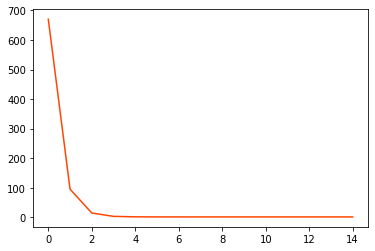

In [7]:
# Zadani su nam podaci

# Podaci su
x = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59], [2.167], [7.042], [10.791], [5.313], [7.998], [3.1]], dtype=np.float32)
y = np.array([[1.7], [2.76], [2.09], [3.19], [2.094], [1.57], [3.366], [2.59], [2.82], [1.221], [2.821], [3.456], [1.65], [2.99], [1.3]], dtype=np.float32)

# No, podatke sada moramo pretvoriti u tenzore
# Postoje dva načina, mi ćemo odabrati prvi
# 1. nacin: napravi deep copy
x_T = torch.tensor(x, dtype = torch.float)
# 2. nacin: napravi shallow copy
#x_train_T = torch.from_numpy(x_train)   

y_T = torch.tensor(y, dtype = torch.float)
              
# Dimenzije neuronske mreže su
inputSize = 1
hiddenSize = 100
outputSize = 1

# Postavimo početne težine na neke slučajno generirane brojeve
w1 = torch.randn(inputSize, hiddenSize, dtype = torch.float, requires_grad = True)
w2 = torch.randn(hiddenSize, outputSize, dtype = torch.float, requires_grad = True)

# Primijetimo dodatni argument koji smo proslijedili
# requires_grad = True <--- to označava da želimo računati gradijent s obzirom
# na te tenzore tijekom prolaska unatrag (backward pass)
    
learningRate = 1e-5

# Algoritam

# za kasnije za crtanje grafa pogreške
loss_values = [] 
n_iter = 15
for i in range(n_iter):
    # Prolazak unaprijed (forward pass): izračunaj predikciju
    # Ono što ćemo napraviti će biti isto kao i u prethodnom algoritmu 
    # No, razlika je što sada radimo s tenzorima
    # A druga razlika je što nam ne trebaju međukoraci jer nećemo ručno računati gradijent
    
    y_pred_T = x_T.mm(w1).clamp(min = 0).mm(w2) 
    #prvi sloj pomnozen s tezinama izmedu prvog i drugog sloja,
    #djelovanje aktivacijskom funkcijom relu(clamp(min=0)) 
    #i onda je to pomnozeno s tezinama izmedu drugog i treceg sloja
    
    # Nakon sto smo napravili jedan prolazak unaprijed idemo izracunati pogresku
    loss = (1/2)*((y_pred_T - y_T)**2).sum() # suma kvadratnih odstupanja
    loss_values.append(loss.item())
    if i%2==0:
        print ('Pogreska u iteraciji {} iznosi {}'.format(i, loss.item()))
    
    # Sada ćemo napraviti backward propagaciju, izračunati gradijente
    # Korsitit ćemo 'autograd'
    # Poziv sljedeće funkcije će izračunati sve gradijente s obzirom na sve
    # tenzore koji imaju oznaku requires_grad=True
    # Dakle, budući da loss ovisi o tenzorima w1 i w2, a oni imaju tu oznaku jer  smo ih tako kreirali
    # izračunati će se ti gradijenti i bit će spremljeni u w1.grad tj, w2.grad
    
    # Poziv funkcije
    loss.backward()
    
    # Sada ćemo ažurirati težine w
    with torch.no_grad():
        
        w1 -= learningRate * w1.grad
        w2 -= learningRate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()
plt.plot(np.arange(0,n_iter,1), loss_values, color='orangered')
plt.plot()

### Primjer 3
Isto samo na efikasniji način

 - linearno preslikavanje smo dosad implementirali kao matrično množenje tenzora prijelaza između dva sloja i nekog vektora (ulaza ili skrivenog sloja)
 - u `torch.nn` se nalazi wrapper za linearno preslikavanje - `nn.Linear`, kojim ljepše i možda efikasnije sve računamo
 - koristit ćemo wrapper `nn.Sequential` u koji redom poslažemo sve komponente mreže
 - aktivacijske funkcije i loss funkcije su već implementirane, npr. `nn.ReLU` i `nn.MSELoss`
 - u `Sequential` klasi je definirana funkcija `parameters` kojom pristupamo svim parametrima tako definiranog modela 

In [8]:
# Zadani su nam podaci

x = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59], [2.167], [7.042], [10.791], [5.313], [7.998], [3.1]], dtype=np.float32)
y = np.array([[1.7], [2.76], [2.09], [3.19], [2.094], [1.57], [3.366], [2.59], [2.82], [1.221], [2.821], [3.456], [1.65], [2.99], [1.3]], dtype=np.float32)

# No, podatke sada moramo pretvoriti u tenzore
# Postoje dva načina, mi ćemo odabrati prvi
# 1. nacin: napravi deep copy
x_T = torch.tensor(x, dtype = torch.float)
# 2. nacin: napravi shallow copy
#x_train_T = torch.from_numpy(x_train)   

y_T = torch.tensor(y, dtype = torch.float)
              
# Dimenzije neuronske mreže su
inputSize = 1
hiddenSize = 100
outputSize = 1

# Koristit ćemo nn paketa
# nn.Sequential je modul koji sadrži druge module i izvršava ih redom

# Ako želimo linearni sloj - ulazni podatak pomnožiti sa svim težinama koristimo
# torch.nn.Linear(inputSize, hiddenSize)

# Ako želimo izračunati ono što smo nazivali z^(2), dakle djelovati na svaki neuron
# aktivacijskom funkcijom zovemo
# torch.nn.ReLu() ili torch.nn.Sigmoid() ili torch.nn.Tanh()
# više na https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity
              
# Ako želimo koristiti neku od standardnih funkcija pogreške koristimo 
# torch.nn.MSELoss() ili nešto drugo https://pytorch.org/docs/stable/nn.html#loss-functions


# Sastavit ćemo neuronsku mrežu na ovaj način

model = torch.nn.Sequential(
        torch.nn.Linear(inputSize, hiddenSize),
        torch.nn.Sigmoid(),
        torch.nn.Linear(hiddenSize, outputSize))

# Odabrat ćemo loss funkciju 
loss_fn = torch.nn.MSELoss()
loss_values = [] 


learningRate = 1e-6
for i in range(500):
    # Prolazak unaprijed (forward pass): izračunaj predikciju
    # Sada je potrebno samo ovo
    y_pred = model(x_T)
    
    
    # Nakon sto smo napravili jedan prolazak unaprijed idemo izracunati pogresku
    loss = loss_fn(y_pred, y_T)
    loss_values.append(loss.item())
    if i%100==0:
        print ('Pogreska u iteraciji {} iznosi {}'.format(i, loss.item()))
    
    # Sada ćemo napraviti backward propagaciju, izračunati gradijente
    # Prvo ćemo ih sve postaviti na 0
    model.zero_grad()
    # Poziv funkcije
    loss.backward()
    
    # Sada ćemo ažurirati težine w
    with torch.no_grad():
        # Proći ćemo kroz sve težine u našem modelu
        for w in model.parameters():
            w -= learningRate * w.grad



Pogreska u iteraciji 0 iznosi 7.096378803253174
Pogreska u iteraciji 100 iznosi 6.9854736328125
Pogreska u iteraciji 200 iznosi 6.876412868499756
Pogreska u iteraciji 300 iznosi 6.769167423248291
Pogreska u iteraciji 400 iznosi 6.663705825805664


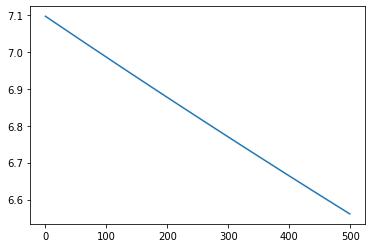

In [9]:
plt.plot(np.arange(0,500,1), loss_values)
plt.show()

## POVRATNA PROPAGACIJA

- Arhitekturu neuronske mreže možemo interpretirati kao **graf računanja** tako da za neki vrh trenutnog sloja postoji brid iz svakog vrha prethodnog sloja.
- Kombiniranjem težina i aktivacijskih funkcija znatno se povećava ekspresivnost modela obzirom na standardne modele strojnog učenja.
- Radi primjera, pretpostavimo da je ulaz u neuronsku mrežu realan broj $w$, funkcija koja ulaz preslikava ulazni u prvi sloj $g$ i funkcija koja skriveni sloj preslikava u izlaz $f$.
- Računanje je tada definirano sa $w \mapsto f(g(w))$, dok derivacije računamo primjenom teorema o deriviranju kompozicije funkcija:

$$
\frac{df}{dw} = \frac{df}{dg}\frac{dg}{dw}
$$
- U algoritmu povratne propagacije koristimo navedeni teorem. Kako je broj neurona velik, na predavanju su uvedene oznake koje "olakšavaju" računanje gradijenta.

In [10]:
X = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59], [2.167], [7.042], [10.791], [5.313], [7.998], [3.1]], dtype=np.float32)
y = np.array([[1.7], [2.76], [2.09], [3.19], [2.094], [1.57], [3.366], [2.59], [2.82], [1.221], [2.821], [3.456], [1.65], [2.99], [1.3]], dtype=np.float32)

X_tensor = torch.tensor(X, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.float)
              
input_size = 1
hidden_size = 100
output_size = 1

w1 = torch.randn(input_size, hidden_size, dtype=torch.float, requires_grad=False)
w2 = torch.randn(hidden_size, output_size, dtype=torch.float, requires_grad=False)

lr = 1e-3
loss_values = [] 
num_iter = 500

sigmoid = nn.Sigmoid()

for i in range(1, num_iter + 1):
    a1 = X_tensor
    z2 = a1 @ w1
    a2 = sigmoid(z2)
    y_pred = a2 @ w2
    
    loss = (y_pred - y_tensor).pow(2).mean()
    loss_values.append(loss.item())
    if i == 1 or i % (num_iter // 5) == 0:
        print (f'Pogreska u iteraciji {i} iznosi {loss}')
    
    # Povratna propagacija
    delta3 = (y_pred - y_tensor)
    delta2 = delta3 @ w2.T * (a2 * (1 - a2))
    grad_w2 = a2.T @ delta3
    grad_w1 = a1.T @ delta2
    
    # Ažuriranje težina
    w1 -= lr * grad_w1
    w2 -= lr * grad_w2

Pogreska u iteraciji 1 iznosi 46.271339416503906
Pogreska u iteraciji 100 iznosi 0.1267114132642746
Pogreska u iteraciji 200 iznosi 0.12585774064064026
Pogreska u iteraciji 300 iznosi 0.1257687509059906
Pogreska u iteraciji 400 iznosi 0.1257115751504898
Pogreska u iteraciji 500 iznosi 0.12567320466041565


### Zadatak
Riješite problem binarne klasifikacije neuronskom mrežom:
 - Dimenzija ulaza je 2 (točke u ravnini)
 - Dimenzija prvog skrivenog sloja je 100, a aktivacijska funkcija $\mathrm{tanh}$
 - Dimenzija drugog skrivenog sloja je 50, a aktivacijska funkcija $\mathrm{tanh}$
 - Dimenzija izlaznog sloja je 2 (broj klasa), a aktivacijska funkcija je (prirodno) $\sigma$

Iskoristite funkciju `make_blobs` kako biste generirali 10000 točaka.

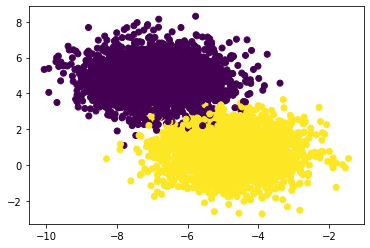

Pogreska u iteraciji 1 iznosi 1.9055430889129639
Pogreska u iteraciji 1000 iznosi 0.1320992112159729
Pogreska u iteraciji 2000 iznosi 0.08923365920782089
Pogreska u iteraciji 3000 iznosi 0.07273920625448227
Pogreska u iteraciji 4000 iznosi 0.06614159792661667
Pogreska u iteraciji 5000 iznosi 0.06234904006123543


In [11]:
X, y = make_blobs(n_samples=5000, n_features=2, centers=2, random_state=12)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
#razdvajanje podataka, pretvorba u tenzore i zadavanje hiperparametara
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train_tensor = torch.tensor(X_train, dtype=torch.float)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).reshape(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).reshape(-1, 1)
              
input_size = 2
hidden_size_1 = 100
hidden_size_2 = 50
output_size = 1

lr = 1e-3
loss_values = [] 
num_iter = 5000

sigmoid = nn.Sigmoid()
relu = nn.ReLU()
tanh = nn.Tanh()
m = X_train_tensor.shape[0]
#treniranje modela
theta_1 = torch.randn(input_size, hidden_size_1, dtype=torch.float, requires_grad=False)
theta_2 = torch.randn(hidden_size_1, hidden_size_2, dtype=torch.float, requires_grad=False)
theta_3 = torch.randn(hidden_size_2, output_size, dtype=torch.float, requires_grad=False)


for i in range(1, num_iter + 1):
    a1 = X_train_tensor
    z2 = a1 @ theta_1
    a2 = tanh(z2)
    z3 = a2 @ theta_2
    a3 = tanh(z3)
    z4 = a3 @ theta_3
    a4 = sigmoid(z4)
    y_pred = a4
    
    loss = (-y_train_tensor * torch.log(y_pred) - (1 - y_train_tensor) * torch.log(1 - y_pred)).mean()
    loss_values.append(loss.item())
    if i == 1 or i % (num_iter // 5) == 0:
        print (f'Pogreska u iteraciji {i} iznosi {loss.item()}')
    
    # Povratna propagacija
    delta4 = (1 / m) * (-y_train_tensor / y_pred + (1 - y_train_tensor) / (1 - y_pred)) * a4 * (1 - a4)
    delta3 = delta4 @ theta_3.T * (1 - a3 * a3)
    delta2 = delta3 @ theta_2.T * (1 - a2 * a2)
    grad_theta_3 = a3.T @ delta4
    grad_theta_2 = a2.T @ delta3
    grad_theta_1 = a1.T @ delta2
    
    # Ažuriranje težina
    theta_1 = theta_1 - lr * grad_theta_1
    theta_2 = theta_2 - lr * grad_theta_2
    theta_3 = theta_3 - lr * grad_theta_3

In [12]:
a1 = X_test_tensor
z2 = a1 @ theta_1
a2 = tanh(z2)
z3 = a2 @ theta_2
a3 = tanh(z3)
z4 = a3 @ theta_3
a4 = sigmoid(z4)
y_pred = a4
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
accuracy = (y_pred == y_test_tensor).sum() / y_pred.shape[0]
print(f'accuracy = {accuracy}')

accuracy = 0.9879999756813049


## Primjer 4
#### Optimizacijski algoritmi
- Optimizacijski algoritmi su osnova procesa strojnog učenja, no za razliku od uobičajene optimizacije gdje je cilj pronaći optimalne parametre, ovdje je cilj postići što veću točnost modela.
- Općenito u neuronskim mrežama, osim ažuriranja težina na spojevima aktivacijski jedinica, potrebno je optimizirati i ostale hiperparametre koji se pojavljuju.
- Stopa učenja je hiperparametar koji je najteže postaviti jer njegova vrijednost značajno utječe na model. 
- AdaGrad algoritam adaptira stopu učenja tako da ju skalira s obzirom na akumulirane vrijednosti gradijenta pripadne funkcije. Tako će parametri koji imaju velike parcijalne derivacije brzo početi koristiti male stope učenja, dok parametri s malim parcijalnim derivacijama neće imati velike promjene u stopi učenja. 

---

- torch.optim paket implementira različite optimizacijske algoritme
- Optimizer konstruiramo tako da damo spremnik (iterable) koji sadrži sve parametre koje moramo optimizirati
- npr. `optimizer = optim.Adam([var1, var2], lr=0.0001)`
- svi optimizatori imaju implementiranu metodu `step()`


##### Adam
`torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)`

In [13]:
class TorchGlassClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.theta_1 = nn.Linear(input_size, hidden_size)
        self.theta_2 = nn.Linear(hidden_size, hidden_size)
        self.theta_3 = nn.Linear(hidden_size, output_size)
        self.tanh = nn.Tanh()
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
model = TorchGlassClassifier(input_size, hidden_size, output_size)


optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

## KLASTERIRANJE

### - TVRDO KLASTERIRANJE

Definicije:

- k-particija skupa: Rastav skupa $A=\{x_i\in \mathbb{R}^n: i=1,\cdots,m\}$ na $1\leq k \leq m$ disjunktnih, nepraznih podskupova $\pi_1, \cdots, \pi_k$
- broj svih k-particija skupa $A$ jednak je Stirlingovom broju druge vrste $|\mathcal{P}(A,k)| = \frac{1}{k!}\sum\limits_{j=1}^k (-1)^(k-j){k \choose j}j^m$
- kvazimetrička funkcija: Funkcija $d:\mathbb{R}^n \times \mathbb{R}^n \rightarrow \mathbb{R}$ sa svojstvima

- najbolji reprezentant (centar): Neka je $d:\mathbb{R}^n \times \mathbb{R}^n \rightarrow \mathbb{R}$ kvazimetrika, najbolji reprezentant skupa $\pi_j$ je $$\mu_j ^* \in \arg\min{\sum\limits_{i=1}^m d(\mu, x_i)}$$

Kvazimetrike koje koristimo: 
- $d_{LS}(x,y) = ||x-y||^2_2$ (least square (LS) kvazimetrička funkcija)
- $d_1(x,y) = |x-y|$ ($l_1$ metrička funkcija, Manhattan metrika)

Najbolji reprezentanti kvazimetrika:

- $L_s$: aritmetička sredina
- $L_1$: medijan

Kriterijska funkcija
- imamo skup $X=\{x_i \in \mathbb{R}^n: i=1,\cdots,m\}$
- $k\geq 1$
- $\mathcal{F} : \mathcal{P}(X,k) \rightarrow \mathbb{R}_+$ (*suma udaljenosti do centra klastera po svim klasterima*)
- $\mathcal{F}(\Pi) = \sum\limits_{j=1}^{k}\sum\limits_{x_i\in\pi_j}d(c_j,x_i)$

Optimizacijski problem
- minimizirati po $ \Pi \in \mathcal{P}(X,k)$
- (globalno) optimalna particija je $\Pi ^* \in \arg\min\limits_{\Pi \in \mathcal{P}(X,k) }{\mathcal{F}(\Pi)}$ 

Formiramo klaster: (princip minimalnih udaljenosti)
- $\pi_j = \{x_i: d(\mu_j, x_i)\leq d(\mu_s,x_i) \forall s=1,\cdots,k\} \; , j=1,\cdots,k$

**k-means algoritam**
1. odaberi početne centre $\mu_1, \cdots, \mu_k$  
2. po principu minimalnih udaljenosti odredi klastere $\pi_j = \{x_i: d(\mu_j, x_i)\leq d(\mu_s,x_i) \forall s=1,\cdots,k\}\; , j=1,\cdots,k$ (*assignment step*)
3. definiramo nove centre  $\mu_j \in \arg\min \sum\limits_{x_i\in \pi_j}d(\mu_j, x_i)$ (*update step*)
4. ponavljaj 2. i 3. sve dok se centri ne počnu ponavljati

K-MEANS ALGORITAM IZ SKLEARN-A

class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')

**argumenti**:<br>
- n_clusters = broj grupa na koje radite podjelu podataka
- init = početni centri
    - ako ne proslijedite ništa k-means++ metoda odabire početne centre tako da metoda najbrže izkonvergira
    - ako proslijedite random, odabiru se slučajno odabrani podaci za centre
    - možete proslijediti numpy array sa centrima po želji
- n_init = broj koliko puta će k-means algoritam biti pokrenut sa različitim odabirima početnog centra. Konačni rezultat algoritma će biti onaj od njih ukupno n_init koji daje najbolji rezultat u smislu najmanje funkcije cilja
- max_iter = maksimalni broj iteracija k-means algoritma
- tol = kada promjena funkcije cilja postane manja od tol, smatramo da se dogodila konvergencija

**pokretanje algoritma**: <br>
pozivom funkcije .fit(podaci)
npr: kmeans. fit(self,X)

**rezultati**: <br>
- cluster_centers_ : centre izračunatih grupa
- labels_ndarray: numpy array koji na i-tom mjestu sadrži oznaku klase kojoj pripada i-ti podatak
- n_iter_int: broj iteracija koje je algoritam izvršio 
- inertia_: vrijednost funkcije cilja

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score

In [ ]:


kmeans = KMeans(n_clusters=3).fit(X)
print(kmeans.cluster_centers_) #koordinate centara svih klastera
print(kmeans.labels_)  #oznake kojem klasteru pripada pojedini podatak
print(kmeans.inertia_) #suma kvadrata udaljenosti od svakog podatka do centra njegovog klastera

In [ ]:
plt.scatter(X[:,0], X[:,1],c='r')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=500, marker='*',c='b')
plt.show()
calinski_harabasz_score(X, kmeans.labels_)

- veći CH indeks znači bolji izbor particije
- $CH= \frac{SS_B}{SS_w} \times \frac{m-k}{k-1}$
- gdje je $m$ broj podataka, $k$ broj klustera, $SS_B$ je ukupna varijanca između klasera, $SS_W$ je ukupna varijanc unutar klastera

### - MEKO KLASTERIRANJE

Svakom podatku dodjeljujemo vjerojatnost da pripada pojedinim klasterima.

Za $i=1,\dots,m$ i $j=1,\dots,k$ uvedemo oznaku
$$
w_{ij} = \begin{cases} 1,  x^{(i)}\in\pi_j,\\ 0 \text{, inače} \end{cases}
$$
kriterijsku funkciju možemo definirati kao
$$
\mathcal{F}(\Pi) = \sum\limits_{i=1}^{m}\sum\limits_{j=1}^{k}w_{ij}d(c_j,x^{(i)})
$$
te vrijedi
$$
\begin{align}
\sum_{j=1}^k w_{ij} & = 1 \\
\sum\limits_{i=1}^{m}\sum\limits_{j=1}^{k}w_{ij} & = m
\end{align}
$$
Kriterijska funkcija :
$$
\Phi(c, W) = \sum\limits_{j=1}^k \sum\limits_{x^{(i)} \in \pi_j} w_{ij}d(c_j, x^{(i)}) 
$$

Želimo minimizirati funkcijuju $\Phi$ po parametrima $\mu$ i $W$ ($W$ je matrica pripadnosti klasteru)

Algoritam
1. početni $\mu_1, \cdots, \mu_k$
2. Assingment step: određujemo optimalnu matricu $W$
2. Update step: ažuriramo parametre $\mu_1, \cdots, \mu_k$ tj. minimiziramo funkciju $\Phi(\mu, W)$ po $\mu$
3. ponovi 2. i 3. dok ne iskonvergira

#### -- Maksimizacija log-likelihood funkcije 
- $X$ je neprekidna slučajna varijabla sa funkcijom gustoće $f_x$
- Vektor slučajnih varijabli $\mathbb{X} = (X_1,\cdots,X_n)$ nazivamo slučajnim uzorkom
- Često promatramo vektor jednako distribuiranih, nezavisnih slučajnih varijabli (i.i.d.)
- Realizaciju $\mathbb{x} = (x_1,\cdots,x_n) \in \mathbb{R}^n$ slučajnog uzorka $\mathbb{X}$ nazivamo uzorkom
- Pretpostavimo da $\mathbb{X}$ ovisi o parametrima $\theta \in \mathcal{P}\subseteq \mathbb{R}^d$

**Funkcije**: 
  - $x\mapsto f_x(x,\theta)$, funkcija gustoće
  - $\theta\mapsto f_x(x,\theta)$, funkcija vjerodostojnosti
  
**Definicija**: Funkcija koja $\theta\mapsto \prod\limits_{i=1}^m f_x(x_i,\theta) = L(\theta,x)$ se zove likelihood/vjerodostojnosna funkcija. 

Parametar  $\hat{\theta} \in \mathcal{P}\subseteq \mathbb{R}^d$ zovemo procjenitelj u smislu maksimalne vjerodostojnosti ako je $L(\hat{\theta},x) = \max\limits_{\theta\in\mathcal{P}}{(\theta,x)}$

Uobičajeno je promatrati, umjesto funkcije $L$ njen logaritam: $l(\theta,x) = \ln{L(\theta,x)}$
pa onda maksimiziramo $l(\theta,x) \rightarrow \max\limits_{\theta\in\mathcal{P}}$

$$ l(\theta,x) = \ln{ \prod\limits_{i=1}^m f_x(x_i,\theta)} = \sum\limits_{i=1}^m \ln{f_x(x_i,\theta)}$$

### Miješane Gaussove distribucije

Neka su:
- $Y_1 \sim \mathcal{N}(\mu_1, \sigma_1^2)$, ..., $Y_k \sim \mathcal{N}(\mu_k, \sigma_k^2)$
- neka je $X$ nova slučajna varijabla čija je funkcija gustoće jdnaka konveksnoj kombinaciji funkcija gustoće slučajnih varijabli $Y_1, ..., Y_k$
 $$f_x(\theta,x) = \sum\limits_{j=1}^k p_j \frac{1}{\sigma_j \sqrt{2\pi}}e^{\frac{-(x_i-\mu_j)^2}{2\sigma_j^2}}$$
- gdje je $\sum_j p_j = 1$

Problem: ako imamo zadane $x_1, \cdots, x_m$ nezavisne realizacije iz distribucije od $X$ treba procijeniti parametre $\hat{\theta} = (\hat{\mu_1},  \hat{\mu_2}, \cdots,  \hat{\mu_k},  \hat{\sigma_1}, \cdots,  \hat{\sigma_k},  \hat{p_1}, \cdots,  \hat{p_k})$

- Ponovno, parametar će biit procijenitelj ako maksimizira funkciju $L(\theta,x)$ što je ekvivalntno maksimizaciji funkcije $l(\theta,x)$
- $\sum\limits_{i=1}^m \ln{(\sum\limits_{j=1}^kp_j \frac{1}{\sigma_j \sqrt{2\pi}}e^{\frac{-(x_i-\mu_j)^2}{2\sigma_j^2}})} \rightarrow \max\limits_{\mu,\sigma,p}$  uz uvjet $\sum_j p_j = 1$
- problem uvjetne optimizacije (cjelobrojno programiranje)
- možemo riješiti uvođenjem Lagrangeove funkcije
- dobijemo rješenja optimizacijskog problema: $\mu_j, \sigma_j, p_j$

### EM algoritam

1. odabiremo početne $(\mu_j, \sigma_j, p_j)$ za $j=1, \dots, k$
2. defniramo $\gamma_{ij}$ (interpretiramo kao vjerojatnost da podatak $x_i$ dolazi iz $Y_j$)
3. računamo nove $(\mu_j, \sigma_j, p_j)$
4. ponavljamo korak 2. i 3. dok ne dođe do konvergencije

### Primjer
Generirajte skup podataka $X = \{x_i \in \mathbb{R}: i=1,\dots,10000\}$ tako da 3000 točaka dolazi iz normalne distribucije s očekivanjem $20$ i i standardnom devijacijom $5$, a ostatak iz normalne distribucije s očekivanjem $40$ i standardnom devijacijom $5$.

Prikažite histogram dobivenog skupa podataka (odnosno uzorka).

Izračunajte očekivanje i standardnu devijaciju skupa podataka i prikažite graf pripadne funkcije gustoće.

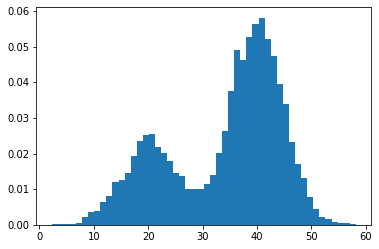

In [4]:
Y1 = np.random.normal(loc=20, scale=5, size=3000)
Y2 = np.random.normal(loc=40, scale=5, size=7000)
X = np.concatenate((Y1, Y2))
# plot the histogram
plt.hist(X, bins=50, density=True)
plt.show()

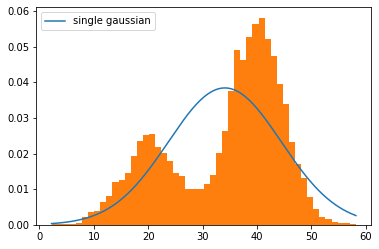

In [5]:
xx = np.linspace(min(X), max(X), 2000)
g_single = stats.norm(np.mean(X), np.std(X)).pdf(xx) # funkcija gustoće normalne distribucije s danim parametrima
plt.plot(xx, g_single, label='single gaussian');
plt.hist(X, bins=50, density=True)
plt.legend();

In [8]:
def fx(x, p, mu, sigma, k):
    """Neefikasna implementacija funkcije gustoće mješovite distribucije
    """
    l = 0
    for j in range(k):
        l += (p[j] / (sigma[j] * np.sqrt(2 * np.pi))) * np.exp(-(x - mu[j])**2 / (2 * sigma[j]**2))
    return l

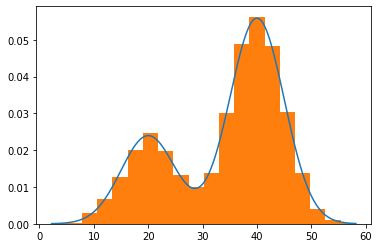

In [9]:
xx = np.linspace(min(X), max(X), 2000)
p = np.array([0.3, 0.7])
mu = np.array([20, 40])
sigma = np.array([5, 5])
k = 2

func = lambda x : fx(x, p, mu, sigma, k)
y = func(xx)

plt.plot(xx, y, label='mixture model')
plt.hist(X, bins=20, density=True)
plt.show()

In [6]:
model = GaussianMixture(n_components=2, tol=0.001, max_iter=100, n_init=1, init_params='kmeans')
model.fit(X.reshape(-1, 1))

print(f'p: {model.weights_.squeeze()}')           #tezine svake komponente(ovdje ima dvije komponente)
print(f'means: {model.means_.squeeze()}')         #ocekivanje
print(f'sigma^2: {model.covariances_.squeeze()}') #srednje kvadraticno odstupanje podatka od srednje vrijednosti
                                                  #sigma je devijacija
print(model.converged_)                           #boolean - konvergira li model ili ne
print(model.n_iter_)                              #broj potrebnih iteracija do konvergencije
print(model.lower_bound_)                         #minimum log-likelihood funkcije

p: [0.30501194 0.69498806]
means: [20.30355261 40.1401183 ]
sigma^2: [26.75062704 23.19830396]
True
3
-3.5721458000133834


### Primjer

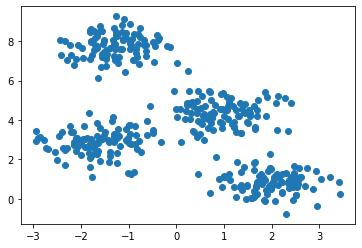

In [13]:
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

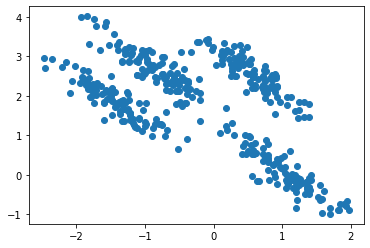

In [14]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
plt.scatter(X_stretched[:,0], X_stretched[:,1])
plt.show()

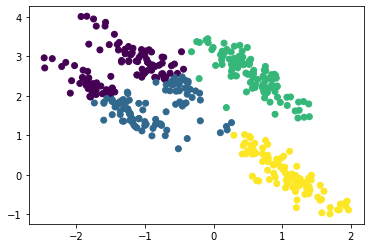

In [15]:
kmeans = KMeans(n_clusters=4).fit(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=kmeans.labels_)

In [16]:
model = GaussianMixture(n_components=4, tol=0.001, max_iter=200, n_init=1, init_params='kmeans')
model.fit(X_stretched)

GaussianMixture(max_iter=200, n_components=4)

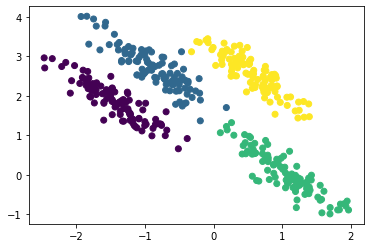

In [17]:
proba = model.predict_proba(X_stretched)
y_pred = proba.argmax(axis=1)
plt.scatter(X_stretched[:,0], X_stretched[:,1], c=y_pred)

## FUCKING RNN

### Arhitektura mreže

- RNN u Torchu možemo jednostavno složiti poput feed-forward mreže kakvu smo imali ranije
- Arhitektura se sastoji od
    - 2 linearna sloja (ulaz i hidden)
    - LogSoftmax na izlaznom sloju
    
Za slaganje mreže opet koristimo `Module` kontejner iz `torch.nn`:
  - Bazna klasa za sve neuronske mreže
  - Klasa u kojoj definiramo model nasljeđuje ovu klasu
  - Obavezno moramo definirati metode: `__init__` i `forward`

In [ ]:
class ClassifierRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ClassifierRNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn_model = ClassifierRNN(n_letters, n_hidden, n_categories)

Kako bismo napravili jedan korak (prolazak) kroz mrežu, trebamo joj proslijediti ulazni podatak. 

U našem slučaju ulazni podatak je tenzor koji sadrži jedno slovo i prethodno skriveno stanje.

U prvom prolazu za prethodno skriveno stanje postavljamo 0.

`input = letter_to_tensor('c')` <br>
`hidden = torch.zeros(1, n_hidden)`  (jedinice su dimenzije n_hidden) <br>
`output, next_hidden = rnn(input, hidden)` <br> 

In [ ]:
input = letter_to_tensor('c')
hidden = torch.zeros(1, n_hidden) #početno skriveno stanje
output, next_hidden = rnn_model(input, hidden)
print(f'output = \n{output}\nnext_hidden = \n{next_hidden}')

In [ ]:
input = line_to_tensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn_model(input[0], hidden)
print(f'output = \n{output}\nnext_hidden = \n{next_hidden}')